### Treść zadania

Dany jest graf spójny nieskierowany $ G = (V, E) $. Proszę zaimplementować funkcję:

    def breaking(G):
        ...

która zwraca taki jego wierzchołek, że jego usunięcie (razem z incydentnymi krawędziami) powoduje, że graf rozpadnie się na jak najwięcej nie połączonych ze sobą części. Funkcja przyjmuje graf reprezentowany przez kwadratową, symetryczną macierz sąsiedztwa i zwraca numer wierzchołka, z założeniem numeracji od zera. Jeśli usunięcie żadnego wierzchołka nie spowoduje tego, że graf przestanie być spójnym, funkcja powinna zwracać $ None $.
<br><br>
Funkcja powinna być możliwie jak najszybsza. Proszę oszacować złożoność czasową i pamięciową użytego algorytmu.
###### Przykład.
Dla grafu zadanego macierzą:

    G = [[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]]

prawidłowym wynikiem jest $ 1 $.

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
M1 = [[0, 1, 1, 0],
      [1, 0, 1, 0],
      [1, 1, 0, 1],
      [0, 0, 1, 0]]

M2 = [[0, 1, 1, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 0, 0, 0, 0, 0, 0],
      [1, 1, 0, 1, 1, 1, 1, 0, 0],
      [0, 0, 1, 0, 1, 0, 0, 0, 0],
      [0, 0, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 0, 0, 0, 0, 1, 0, 1],
      [0, 0, 0, 0, 0, 0, 1, 1, 0]]

M3 = [[0, 1, 1],
      [1, 0, 1],
      [1, 1, 0]]

M4 = [[0, 1, 1, 1, 0, 0, 0],
      [1, 0, 0, 0, 1, 0, 0],
      [1, 0, 0, 0, 0, 1, 0],
      [1, 0, 0, 0, 0, 0, 1],
      [0, 1, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 0, 0]]

M5 = [[0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 1, 0],
      [1, 0, 0, 0, 0, 0, 1],
      [0, 1, 0, 0, 0, 0, 1],
      [0, 0, 1, 0, 0, 0, 1],
      [0, 0, 0, 1, 1, 1, 0]]

# 0 1 2 3 4 5 6 7 8 9 
M6 = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # 0
      [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # 1
      [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # 2
      [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],  # 3
      [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],  # 4
      [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # 5
      [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # 6
      [0, 0, 0, 1, 0, 0, 0, 0, 1, 1],  # 7
      [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # 8
      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]]  # 9

n = 250
M7 = [[1] * n for i in range(n)]
for i in range(n):
    M7[i][i] = 0

M8 = [[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
      [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
      [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0],
      [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
      [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
      [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
      [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
      [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
      [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
      [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
      [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
      [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
      [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
      [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
      [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
      [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
      [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1],
      [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
      [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
      [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      [0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
      [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
      [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
      [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
      [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
      [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
      [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
      [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
      [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0],
      [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]]

TESTS = [(M1, 2),
         (M2, 2),
         (M3, None),
         (M4, 0),
         (M5, 6),
         (M6, 3),
         (M7, None),
         (M8, None)
         ]


def runtests(f):
    problems_count = 0
    for i, x in enumerate(TESTS):
        print()
        print(f"--- (test #{i + 1}) ----------------------")
        print("Liczba wierzcholkow:", len(x[0]))
        print("Dane wejściowe:")
        if len(x[0]) < 15:
            for i in range(len(x[0])):
                print(x[0][i])
        else:
            print("<< za duze do wypisania >>")
        v = f(x[0])
        print("Uzyskany wynik: ", v)
        print("Oczekiwany wynik: ", x[1])
        if v == x[1]:
            print("OK!")
        else:
            print("PROBLEM!")
            problems_count += 1

    print()
    print("------------------------------------")
    print("------------------------------------")
    if problems_count > 0:
        print(f"Jest {problems_count} problemów!")
    else:
        print("Wszystko OK!")

### Omówienie algorytmu

Ponieważ chcemy usunąć tylko jeden wierzchołek (graf jest zawsze spójny, co mamy powiedziane w poleceniu), który powoduje rozpadnięcie się grafu na nawiększą liczbę składowych, oczywistym wydaje się skorzystanie z algorytmu, który znajduje punkty artykulacji w grafie (przykładowa implementacja <a href="../../../Pozostałe zadania/Zadania z wykładu/Algorytmy grafowe/[Grafowe] Znajdowanie mostów w grafie, punkty artykulacji.ipynb">TUTAJ</a>). Musimy jeszcze w wydajny sposób sprawdzić, na ile składowych podzieli nam się graf przy usunięciu danego wierzchołka oraz incydentnych krawędzi. Nie możemy tak po prostu sprawdzić stopnia wierzchołka, co pokazałem w przykładzie <a href="#example">TUTAJ</a>, ponieważ wierzchołek $ 0 $ ma stopień równy $ 7 $, ale jego usunięcie powoduje powstanie $ 4 $ składowych, natomiast wierzchołek $ 7 $ ma stopień równy $ 5 $, a jego usunięcie już powoduje rozpad grafu na $ 5 $ części. Musimy w jakiś sposób sprawdzić, do której składowej należą dane krawędzie i, jeżeli wierzchołek, który sprawdzamy, będący punktem artykulacji, połączony jest kilkoma krawędziami z tą samą składową grafu, którą otrzymamy po jego usunięciu, dodamy tylko $ 1 $ do liczby składowych. Najłatwiej jest po prostu, przy pomocy algorytmu BFS lub DFS, mając zapisaną informację dla każdego z wierzchołków, czy jest on punktem artykulacji, czy nie, wywołać DFS/BFS dla każdej składowej osobno i przypisać każdej ze składowych, na jakie zostałby podzielony graf, jeżeli byśmy usunęli wszystkie punkty artykulacji jednocześnie, rozróżnialne id (liczbę, którą nazwałem $ token $). Ponieważ również możemy mieć sytuację, w której kilka punktów artykulacji jest ze sobą połączonych (np. graf $ P_n $ - tzw. ścieżka), również punktom artykulacji przypisujemy rozróżnialne id ($ token $). Ostatnim krokiem jest sprawdzenie dla każdego z punktów artykulacji wszystkich wychodzących z niego krawędzi i zliczenie liczby części, jakie by powstały, po usunięciu sprawdzanego wierzchołka. Tutaj też musimy się wykazać sprytem, aby nie tworzyć dla każdego z wierzchołków osobnej tablicy $ V $-elementowej (osiągnęlibyśmy złożoność pamięciową $ O(V^2) $ zamiast $ O(V) $ - przy założeniu, że graf otrzymany na wejściu, nie jest wliczany do złożoności). Najlepiej jest stworzyć jedną tablicę $ V $-elementową, a dla każdego kolejnego punktu artykulacji, zastosować liczbę ($ token $) o $ 1 $ większą od poprzedniej do oznaczania tego, czy już wcześniej napotkaliśmy krawędź, która łączy punkt artykulacji z daną składową, czy nie ($ token $ pełni rolę wartości boolowskiej $ True $, a wartość mniejsza od $ token $ jest interpretowana jak wartość $ False $). Przy trafieniu na wartość mniejszą od $ token $, zwiększamy liczbę składowych o $ 1 $, natomiast przy trafieniu na $ token $, przechodzimy do sprawdzenia następnej krawędzi. Po sprawdzeniu wszystkich krawędzi, jakie wychodzą z danego wierzchołka, porównujemy otrzymaną liczbę składowych z największą zapisaną liczbą. Jeżeli jest ona większa, to aktualizujemy zapisaną wartość oraz zapamiętany wierzchołek, który będzie rezultatem. Oczywiście przed sprawdzeniem każdego kolejnego punktu artykulacji, resetujemy licznik składowych (przypisujemy mu $ 0 $).

### Złożoność

###### Obliczeniowa:
$ O(V^2) $ - otrzymujemy graf w reprezentacji macierzowej, więc wykorzystywane algorymy działają w tym czasie
###### Pamięciowa:
$ O(V) $ - grafu, który otrzymujemy na wejściu, nie wliczam do złożoności pamięciowej

### Implementacja

In [2]:
def find_articulation_points(G: 'graph represented by adjacency matrix'):
    n = len(G)
    low    = [0] * n
    times  = [0] * n
    is_art = [False] * n
    time   = 0
    
    def dfs(root, u, parent):
        nonlocal time
        time += 1
        low[u] = times[u] = time
        out_deg = 0
        
        for v in range(n):
            if not G[u][v] or v == parent: continue
            if not times[v]:
                out_deg += dfs(root, v, u) + u == root
                low[u] = min(low[u], low[v])
                if times[u] <= low[v]:
                    is_art[u] = True
            else:
                low[u] = min(low[u], times[v])
        
        return out_deg
                
    # Check all possible starting vertices as a graph doesn't have to be consistent
    for u in range(n):
        if not times[u]:
            is_art[u] = dfs(u, u, -1) > 1

    return is_art


def number_components(G, is_art):
    n = len(G)
    numbers = [-1] * n
    token = 0
    
    def dfs(u):
        numbers[u] = token
        for v in range(n):
            if G[u][v] and numbers[v] < 0 and not is_art[v]:
                dfs(v)
    
    for u in range(n):
        if numbers[u] < 0:
            if not is_art[u]:
                dfs(u)
            else:
                numbers[u] = token
            token += 1
            
    return numbers


def breaking(G):
    n = len(G)
    is_art = find_articulation_points(G)
    c_num = number_components(G, is_art)
    # Look fo an articulation point which splits a graph into the
    # greatest number of separate components
    found_c = [0] * n
    token = 1
    
    max_count = 0
    best_u = None
    
    for u in range(n):
        if is_art[u]:
            count = 0
            for v in range(n):
                if G[u][v] and found_c[c_num[v]] < token:
                    found_c[c_num[v]] = token
                    count += 1
            if count > max_count:
                max_count = count
                best_u = u
        token += 1
                
    return best_u

###### Kilka testów

In [3]:
runtests(breaking)


--- (test #1) ----------------------
Liczba wierzcholkow: 4
Dane wejściowe:
[0, 1, 1, 0]
[1, 0, 1, 0]
[1, 1, 0, 1]
[0, 0, 1, 0]
Uzyskany wynik:  2
Oczekiwany wynik:  2
OK!

--- (test #2) ----------------------
Liczba wierzcholkow: 9
Dane wejściowe:
[0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 1, 0]
Uzyskany wynik:  2
Oczekiwany wynik:  2
OK!

--- (test #3) ----------------------
Liczba wierzcholkow: 3
Dane wejściowe:
[0, 1, 1]
[1, 0, 1]
[1, 1, 0]
Uzyskany wynik:  None
Oczekiwany wynik:  None
OK!

--- (test #4) ----------------------
Liczba wierzcholkow: 7
Dane wejściowe:
[0, 1, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0]
Uzyskany wynik:  0
Oczekiwany wynik:  0
OK!

--- (test #5) -------

##### Pomocnicze:

In [4]:
def graph_adjacency_matrix(E: 'array of edges'):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    
    G = [[0] * n for _ in range(n)]
    for e in E:
        G[e[0]][e[1]] = G[e[1]][e[0]] = 1
    return G

##### Dodatkowe testy:

<span id="example"></span>
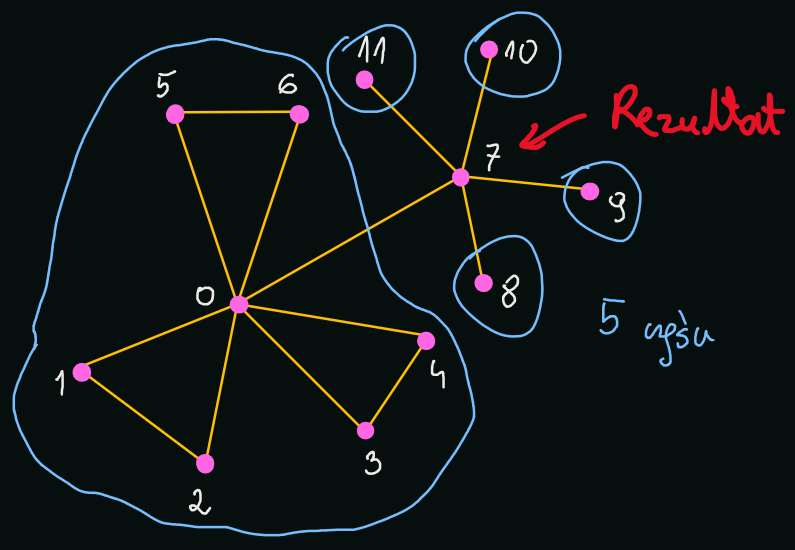

In [5]:
E = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (3, 4), (5, 6), (7, 8), (7, 9),
     (7, 10), (7, 11)]

G = graph_adjacency_matrix(E)
print(breaking(G))

7
